# Referências

- [Show counts and percentages for bar plots](https://plotnine.readthedocs.io/en/stable/tutorials/miscellaneous-show-counts-and-percentages-for-bar-plots.html)
- [Custom sorting of plot series](https://plotnine.readthedocs.io/en/stable/tutorials/miscellaneous-order-plot-series.html)
- [Plotting with `plotnine`](https://www.practicaldatascience.org/html/plotting_part1.html)
- [Making beautiful boxplots using plotnine in Python](https://t-redactyl.io/blog/2020/09/making-beautiful-boxplots-using-plotnine-in-python.html)

In [ ]:
# versão mais recente
!pip install plotnine==0.8.0

In [2]:
import pandas as pd
from plotnine import *
from plotnine.data import mtcars

# Show Counts and Percentages for Bar Plots

In [3]:
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### We can plot a bar graph and easily show the counts for each bar

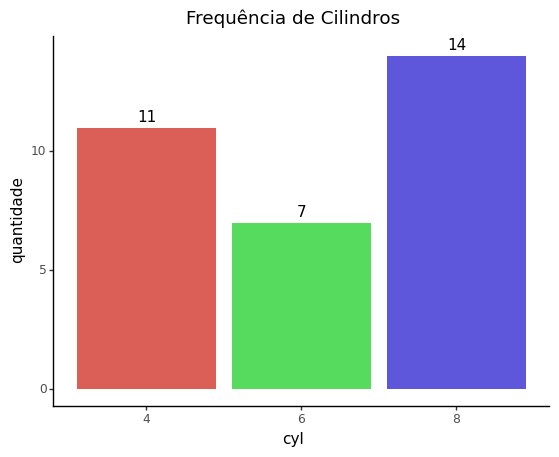

<ggplot: (8770787185909)>

In [4]:
(
    ggplot(mtcars, aes('factor(cyl)', fill='factor(cyl)'))
    + geom_bar()
    + geom_text(
        aes(label=after_stat('count')),
        stat='count',
        nudge_y=0.125,
        va='bottom'
    )
    + labs(x='cyl', y='quantidade', title='Frequência de Cilindros')
    + scale_fill_discrete(guide=False)
    + theme_classic()
)

### `stat_count` also calculates proportions (as `prop`) and a proportion can be converted to a percentage.

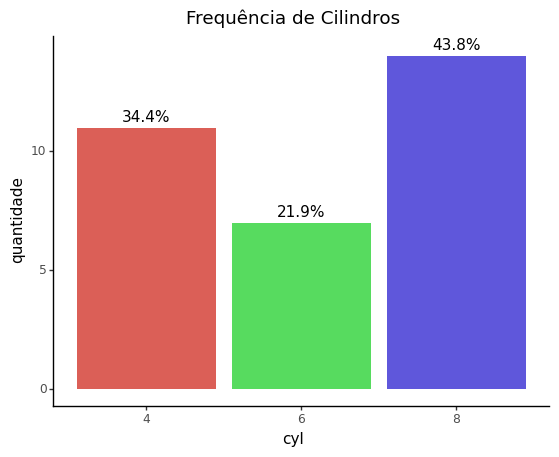

<ggplot: (8770776976985)>

In [5]:
(
    ggplot(mtcars, aes('factor(cyl)', fill='factor(cyl)'))
    + geom_bar()
    + geom_text(
        aes(label=after_stat('prop*100'), group=1),
        stat='count',
        nudge_y=0.125,
        va='bottom',
        format_string='{:.1f}%'
    )
    + labs(x='cyl', y='quantidade', title='Frequência de Cilindros')
    + scale_fill_discrete(guide=False)
    + theme_classic()
)

### We can get the `counts` and we can get the `percentages` we need to print both. Just add another `geom_text` layer.

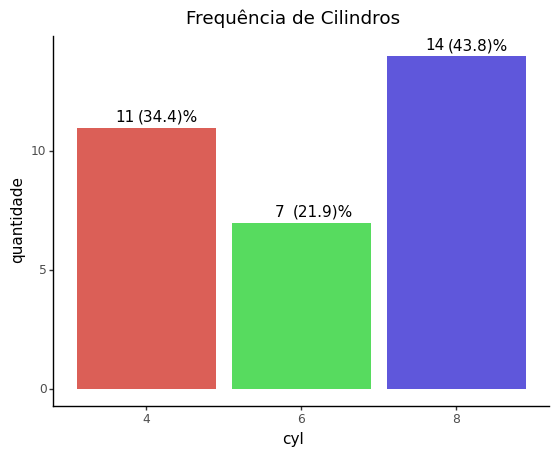

<ggplot: (8770776986093)>

In [6]:
(
    ggplot(mtcars, aes('factor(cyl)', fill='factor(cyl)'))
    + geom_bar()
    + geom_text(
        aes(label=after_stat('count')),
        stat='count',
        nudge_x=-0.14,
        nudge_y=0.125,
        va='bottom'
    )
    + geom_text(
        aes(label=after_stat('prop*100'), group=1),
        stat='count',
        nudge_x=0.14,
        nudge_y=0.125,
        va='bottom',
        format_string='({:.1f})%'
    )
    + labs(x='cyl', y='quantidade', title='Frequência de Cilindros')
    + scale_fill_discrete(guide=False)
    + theme_classic()
)

### It works with facetting.

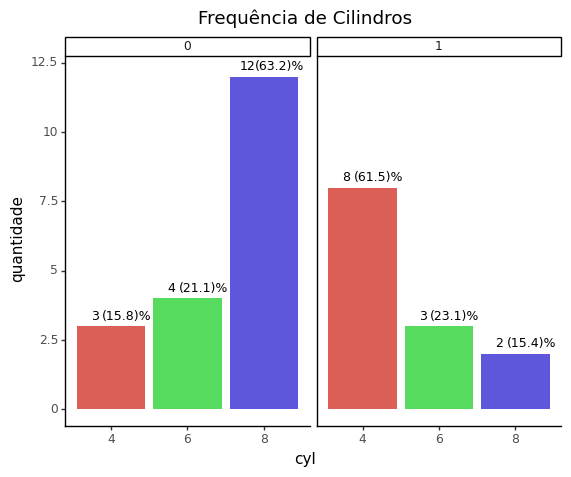

<ggplot: (8770776946613)>

In [7]:
(
    ggplot(mtcars, aes('factor(cyl)', fill='factor(cyl)'))
    + geom_bar()
    + geom_text(
        aes(label=after_stat('count')),
        stat='count',
        nudge_x=-0.21,
        nudge_y=0.125,
        va='bottom',
        size=9
    )
    + geom_text(
        aes(label=after_stat('prop*100'), group=1),
        stat='count',
        nudge_x=0.21,
        nudge_y=0.125,
        va='bottom',
        size=9,
        format_string='({:.1f})%'
    )
    + labs(x='cyl', y='quantidade', title='Frequência de Cilindros')
    + scale_fill_discrete(guide=False)
    + theme_classic()
    + facet_wrap('am')
)

# Custom Sorting of Plot Series

In [8]:
from plotnine.data import mpg

In [9]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### Bar plot of manufacturer - Default Output

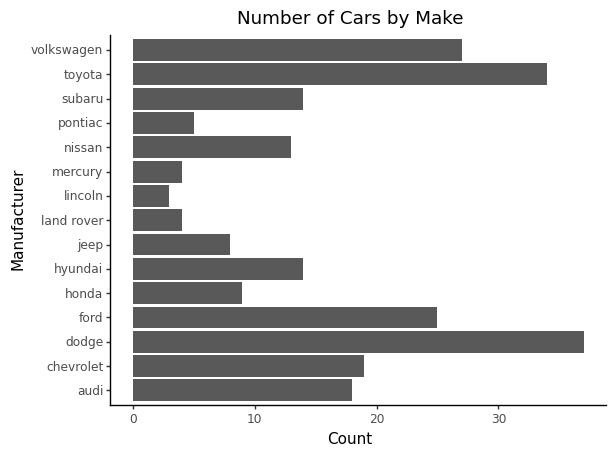

<ggplot: (8770776928817)>

In [10]:
(
    ggplot(mpg, aes(x='manufacturer'))
    + geom_bar(size=20)
    + coord_flip()
    + labs(y='Count', x='Manufacturer', title='Number of Cars by Make')
    + theme_classic()
)

### Bar plot of manufacturer - Ordered by count (Categorical)

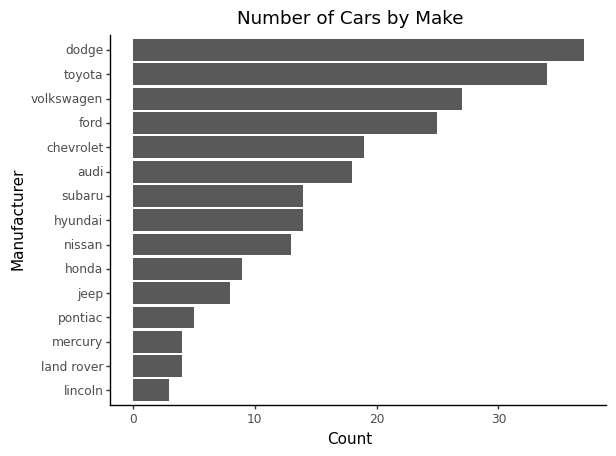

<ggplot: (8770776790661)>

In [12]:
manufacturer_list = mpg['manufacturer'].value_counts(ascending=True).index.tolist()

(
    ggplot(mpg, aes(x='manufacturer'))
    + geom_bar(size=20)
    + coord_flip()
    + scale_x_discrete(limits=manufacturer_list)
    + labs(y='Count', x='Manufacturer', title='Number of Cars by Make')
    + theme_classic()
)

# Bônus: Bar Plot with Currency Format

## Dolar Format

In [18]:
preco_acoes = {'GOOG' : 73721.44, 'FB' : 35043.38, 'TWTR' : 18000.44, 'AMZN' : 74423.58, 'AAPL' : 81230.40,'NFLX' : 8568.55}

acoes = (
    pd.Series(preco_acoes)
    .reset_index()
    .rename(columns={'index':'acao', 0:'preco'})
)
acoes

,acao,preco
0,GOOG,73721.44
1,FB,35043.38
2,TWTR,18000.44
3,AMZN,74423.58
4,AAPL,81230.40
5,NFLX,8568.55


In [20]:
import plotnine
plotnine.options.figure_size # default figure size

(6.4, 4.8)

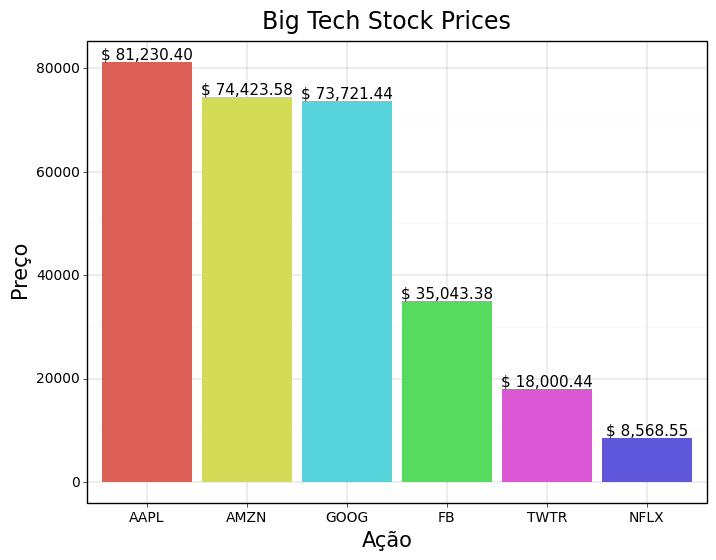

<ggplot: (8770776421021)>

In [23]:
plotnine.options.figure_size = (8, 6) # increasing figure size

acao_list = acoes.sort_values(by='preco', ascending=False)['acao'].values.tolist()

(
    ggplot(acoes, aes(x='factor(acao)', y='preco', fill='factor(acao)'))
    + geom_col()
    + geom_text(
        aes(label='preco', group=1),
        va='bottom',
        format_string='$ {:,.2f}'
    )
    + labs(x='Ação', y='Preço', title='Big Tech Stock Prices')
    + scale_x_discrete(limits=acao_list)
    # + scale_fill_manual(values=['red', 'blue', 'green', 'cyan', 'violet', '#AABBCC'])
    + scale_fill_discrete(guide=False)
    + theme_linedraw()
    + theme(axis_text_x=element_text(family='Arial', size=10),
            axis_text_y=element_text(family='Arial', size=10),
            text=element_text(family='Arial', size=15),
            plot_title=element_text(family='Arial', size=17))
)

## Real Format

In [44]:
acoes = (
    acoes
    .assign(preco_dolar_fmt = lambda df: df['preco'].apply(lambda x: "$ {:,.2f}".format(x)))
    .assign(preco_real_fmt  = lambda df: df['preco_dolar_fmt'].str.replace(",", "X") \
                                                                .str.replace(".", ",") \
                                                                .str.replace("X", ".") \
                                                                .str.replace("$", "R$ "))
)
acoes

,acao,preco,preco_dolar_fmt,preco_real_fmt
0,GOOG,73721.44,"$ 73,721.44","R$ 73.721,44"
1,FB,35043.38,"$ 35,043.38","R$ 35.043,38"
2,TWTR,18000.44,"$ 18,000.44","R$ 18.000,44"
3,AMZN,74423.58,"$ 74,423.58","R$ 74.423,58"
4,AAPL,81230.40,"$ 81,230.40","R$ 81.230,40"
5,NFLX,8568.55,"$ 8,568.55","R$ 8.568,55"


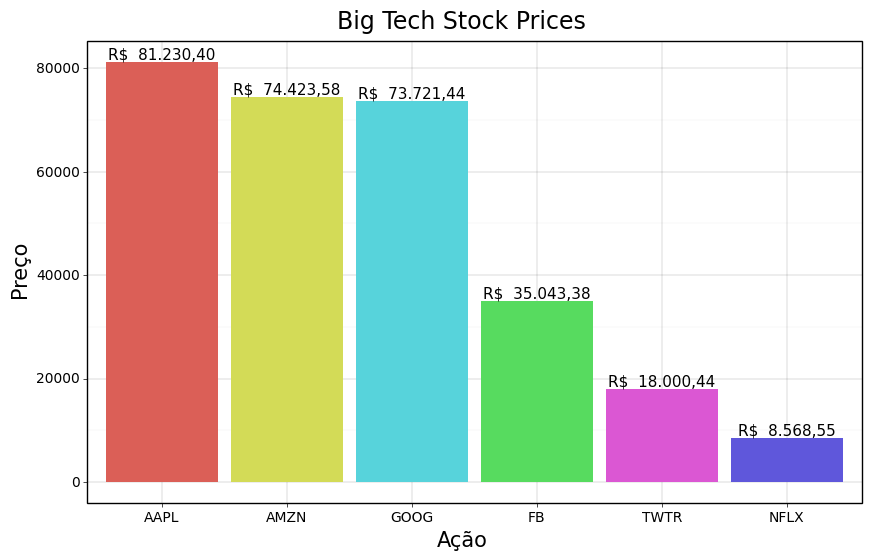

<ggplot: (8770771521745)>

In [45]:
plotnine.options.figure_size = (10, 6) # increasing figure size

acao_list = acoes.sort_values(by='preco', ascending=False)['acao'].values.tolist()

(
    ggplot(acoes, aes(x='factor(acao)', y='preco', fill='factor(acao)'))
    + geom_col()
    + geom_text(
        aes(label='preco_real_fmt', group=1),
        va='bottom',
    )
    + labs(x='Ação', y='Preço', title='Big Tech Stock Prices')
    + scale_x_discrete(limits=acao_list)
    # + scale_fill_manual(values=['red', 'blue', 'green', 'cyan', 'violet', '#AABBCC'])
    + scale_fill_discrete(guide=False)
    + theme_linedraw()
    + theme(axis_text_x=element_text(family='Arial', size=10),
            axis_text_y=element_text(family='Arial', size=10),
            text=element_text(family='Arial', size=15),
            plot_title=element_text(family='Arial', size=17))
)

## Real Format: Another Example

In [46]:
receitas = pd.DataFrame({
    "ano_venda": [2006, 2007, 2008, 2009, 2010],
    "receita": [232721351, 246972954, 218905841, 246231087, 126038205]
})

In [50]:
receitas = (
    receitas
    .assign(receita_dolar_fmt = lambda df: df['receita'].apply(lambda x: "$ {:,.2f}".format(x)))
    .assign(receita_real_fmt  = lambda df: df['receita_dolar_fmt'].str.replace(",", "X") \
                                                                    .str.replace(".", ",") \
                                                                    .str.replace("X", ".") \
                                                                    .str.replace("$", "R$ "))
)
receitas

,ano_venda,receita,receita_dolar_fmt,receita_real_fmt
0,2006,232721351,"$ 232,721,351.00","R$ 232.721.351,00"
1,2007,246972954,"$ 246,972,954.00","R$ 246.972.954,00"
2,2008,218905841,"$ 218,905,841.00","R$ 218.905.841,00"
3,2009,246231087,"$ 246,231,087.00","R$ 246.231.087,00"
4,2010,126038205,"$ 126,038,205.00","R$ 126.038.205,00"


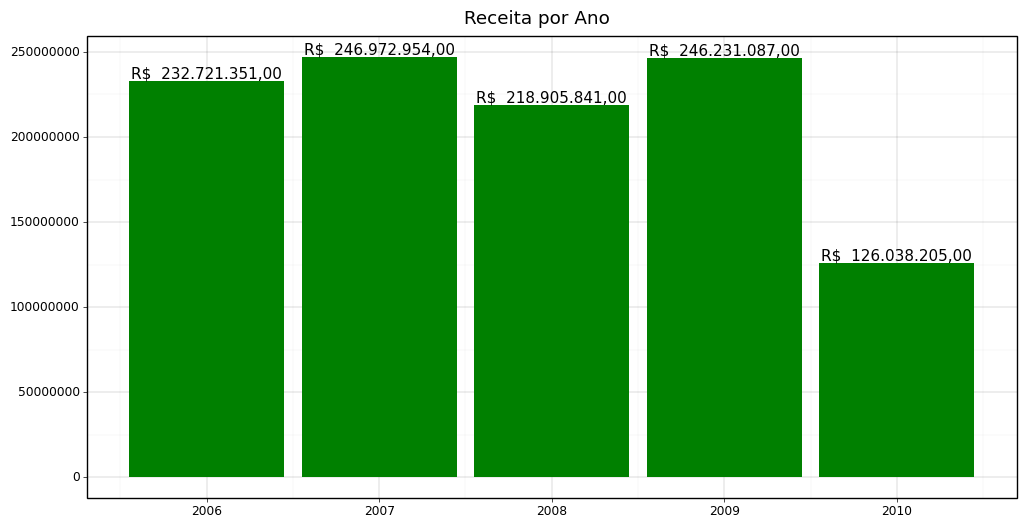

<ggplot: (8770771439313)>

In [52]:
plotnine.options.figure_size = (12, 6)

(
    ggplot(receitas, aes(x="ano_venda", y="receita"))
    + geom_col(fill="green")
    + geom_text(aes(label="receita_real_fmt"),
                va='bottom')
    + labs(x="", y="", title="Receita por Ano")
    + theme_linedraw()
)